In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [3]:
df.shape

(8949, 17)

# PCA Using Eigen Decomposition

### Step 1: Standardize the dataset (Subtract mean and divide by standard deviation).

In [4]:
mean = df.mean(axis = 0) 
print(mean)
std = df.std(axis = 0) 
print(std)

BALANCE                             1564.647593
BALANCE_FREQUENCY                      0.877350
PURCHASES                           1003.316936
ONEOFF_PURCHASES                     592.503572
INSTALLMENTS_PURCHASES               411.113579
CASH_ADVANCE                         978.959616
PURCHASES_FREQUENCY                    0.490405
ONEOFF_PURCHASES_FREQUENCY             0.202480
PURCHASES_INSTALLMENTS_FREQUENCY       0.364478
CASH_ADVANCE_FREQUENCY                 0.135141
CASH_ADVANCE_TRX                       3.249078
PURCHASES_TRX                         14.711476
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.336511
MINIMUM_PAYMENTS                     864.301501
PRC_FULL_PAYMENT                       0.153732
TENURE                                11.517935
dtype: float64
BALANCE                             2081.584016
BALANCE_FREQUENCY                      0.236798
PURCHASES                           2136.727848
ONEOFF_PURCHASES         

In [5]:
df=df-df.mean(axis = 0)
Standardized_data=df/ df.std(axis = 0)
Standardized_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732013,-0.249867,-0.424910,-0.356937,-0.349095,-0.466779,-0.806604,-0.678678,-0.707370,-0.675257,-0.476056,-0.511352,-0.960326,-0.528997,-0.310976,-0.525559,0.360521
1,0.786814,0.134042,-0.469558,-0.356937,-0.454581,2.605292,-1.221860,-0.678678,-0.917038,0.573917,0.110025,-0.591807,0.688562,0.818500,0.089260,0.234146,0.360521
2,0.447016,0.517951,-0.107710,0.108837,-0.454581,-0.466779,1.269671,2.673145,-0.917038,-0.675257,-0.476056,-0.109076,0.825969,-0.383836,-0.101693,-0.525559,0.360521
3,0.049012,-1.017686,0.231982,0.546092,-0.454581,-0.368657,-1.014233,-0.399361,-0.917038,-0.258867,-0.329536,-0.551580,0.825969,-0.598700,-0.000041,-0.525559,0.360521
4,-0.358829,0.517951,-0.462070,-0.347298,-0.454581,-0.466779,-1.014233,-0.399361,-0.917038,-0.675257,-0.476056,-0.551580,-0.905363,-0.364401,-0.265804,-0.525559,0.360521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737974,0.517951,-0.333312,-0.356937,-0.132681,-0.466779,1.269671,-0.678678,1.179654,-0.675257,-0.476056,-0.350442,-0.960326,-0.486238,-0.349858,1.183778,-4.126688
8946,-0.742446,0.517951,-0.329156,-0.356937,-0.122862,-0.466779,1.269671,-0.678678,1.179654,-0.675257,-0.476056,-0.350442,-0.960326,-0.503416,-0.000041,-0.525559,-4.126688
8947,-0.740421,-0.185885,-0.401978,-0.356937,-0.294914,-0.466779,0.854415,-0.678678,0.760317,-0.675257,-0.476056,-0.390669,-0.960326,-0.570629,-0.335471,0.329110,-4.126688
8948,-0.745197,-0.185885,-0.469558,-0.356937,-0.454581,-0.449348,-1.221860,-0.678678,-0.917038,0.157527,-0.183015,-0.591807,-1.097733,-0.580549,-0.346911,0.329110,-4.126688


### Step 2: Calculate the covariance matrix for the features in the dataset.
#### Use the formula (X.T@X) / n then confirm using np.cov()

In [6]:
covmtrx=np.cov(Standardized_data.T,ddof=0)
covmtrx.shape

(17, 17)

### Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
### Step 4: Sort eigenvalues and their corresponding eigenvectors.

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(covmtrx)
print('Eigen Values:\n',eigenvalues)
print('\nEigen Vectors:\n',eigenvectors.shape)

Eigen Values:
 [4.63840377e+00 3.45106748e+00 1.49430199e+00 1.27163121e+00
 1.06462111e+00 9.77449376e-01 8.30719332e-01 7.23529009e-01
 6.51117493e-01 5.23549226e-01 4.03198526e-01 3.01497286e-01
 2.42486419e-01 1.72194291e-01 2.06927590e-01 4.53945816e-02
 1.16477398e-05]

Eigen Vectors:
 (17, 17)


In [8]:
sorted_indices = np.argsort(eigenvalues)[::-1]  # Get indices to sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort corresponding eigenvectors


### Step 5: Pick k or retio eigenvalues and form a matrix of eigenvectors.
#### 95%

In [9]:
eigenvalues_prsnt = (sorted_eigenvalues/sum(sorted_eigenvalues))
eigenvalues_prsnt

array([2.72877773e-01, 2.03026657e-01, 8.79099403e-02, 7.48101958e-02,
       6.26317700e-02, 5.75034478e-02, 4.88713042e-02, 4.25652864e-02,
       3.83053094e-02, 3.08004551e-02, 2.37202110e-02, 1.77371165e-02,
       1.42655011e-02, 1.21735715e-02, 1.01302079e-02, 2.67056792e-03,
       6.85237739e-07])

In [10]:
eigenvalues_cum = np.cumsum(eigenvalues_prsnt)
eigenvalues_cum

array([0.27287777, 0.47590443, 0.56381437, 0.63862457, 0.70125634,
       0.75875978, 0.80763109, 0.85019637, 0.88850168, 0.91930214,
       0.94302235, 0.96075947, 0.97502497, 0.98719854, 0.99732875,
       0.99999931, 1.        ])

In [11]:
eigenvalues_cum <= 0.95

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False])

In [12]:
#t=eigenvectors[:,0:5]
#t.shape

t=sorted_eigenvectors[:,eigenvalues_cum <= 0.95]
t.shape

(17, 11)

### Step 6:Transform the original matrix.

In [13]:
TransformedData=Standardized_data @ t
print('Transformed Data:')
TransformedData.shape


Transformed Data:


(8949, 11)

# Let's combine all of the above into class

In [15]:
class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = X.mean(axis=0)
        self.std1 = X.std(axis=0)
        self.var1 = X.var(axis=0)

        # fill
        #X=((X-self.mean)/self.std1)
        X=((X-self.mean)/self.std1)

        covM= np.cov(X.T) #X.T@X
        self.eigenvalues, self.eigenvectors = np.linalg.eig(covM)
        print(self.eigenvalues.round(2))
        s=self.eigenvalues.sum()
        self.variance_ratio = self.eigenvalues/s
        if self.n_components > 1:
            self.components = self.eigenvectors[:,:self.n_components]
        else: 
            self.variance_ratio_cum_sum = self.variance_ratio.cumsum()
            self.components=self.eigenvectors[:, self.variance_ratio_cum_sum <= self.n_components]        

        #self.components = #matrix (n,)

        #return X_new

    def transform(self,Z):
        # fill
        #Z=((Z-self.mean)/self.std1)
        Z=((Z-self.mean)/self.std1)


        Z_new = self.TransformedData=Z @ self.components


        return Z_new

    def plot_explained_variance(self):
        plt.plot(self.variance_ratio_cum_sum)
        plt.xlabel('Number of components')
        plt.ylabel('Explained variance')
        plt.show()

In [16]:
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)


[4.64 3.45 1.49 1.27 1.06 0.98 0.83 0.72 0.65 0.52 0.4  0.3  0.24 0.21
 0.17 0.05 0.  ]


In [17]:
print(pca_section.components.shape)
print("expected shape: (17,11)")

(17, 11)
expected shape: (17,11)


In [18]:
pca_section.transform(df.values).shape

(8949, 11)

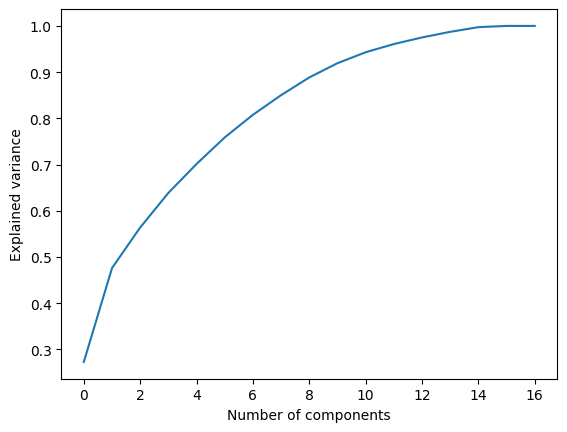

In [19]:
pca_section.plot_explained_variance()